# City Weather Comparison

This notebook contains daily weather data for Cincinnati OH/Northern KY, Louisville KY, New York City NY, and Los Angeles CA, from January 2022 to December 2022. The data was requested from the NOAA Climate.gov website. Analysis of daily temperature highs, lows, and averages, as well as snowfall and precipitation will show which months are the hottest and coldest, including the months with the most precipitation and snowfall. 

# Feature 1: Read in data from a local CSV file 
'Weather_Datasets/Data-Cinci_NKY_Weather.csv', 'Weather_Datasets/Louisville_Weather_CSV.csv', 'Weather_Datasets/New_York_Weather.csv', 'Weather_Datasets/Los_Angeles_Weather.csv'

Use pandas library to read csv files. Import pandas and numpy libraries for data analysis and mathematical calculations. Import matplotlib for data visualization, and datetime module to work with dates as datetime64.

In [2]:
# Packages
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 

In [3]:
# DataFrames
df1_Cin_NKY_W = pd.read_csv('Weather_Datasets/Weather_Data-Cinci_NKY_Weather.csv') 
# A dataframe is a data structure, which organizes data into a two dimensional structure of colums and rows.
df2_Louis_W = pd.read_csv('Weather_Datasets/Louisville_Weather_CSV.csv') 
df3_NYC_W = pd.read_csv('Weather_Datasets/New_York_Weather.csv') # The read_csv() function allows the user to import a csv file.
df4_LA_W = pd.read_csv('Weather_Datasets/Los_Angeles_Weather.csv') 

# Set datetime
df1_Cin_NKY_W['DATE'] = pd.to_datetime(df1_Cin_NKY_W['DATE']) 
df2_Louis_W['DATE'] = pd.to_datetime(df2_Louis_W['DATE']) # The datetime() module allows the user to work with dates as objects.
df3_NYC_W['DATE'] = pd.to_datetime(df3_NYC_W['DATE'])
df4_LA_W['DATE'] = pd.to_datetime(df4_LA_W['DATE']) 

# Data before cleaning
There are two columns, 'LATITUDE' and 'LONGITUDE' that are not needed. 
The 'NAME' column needs to be renamed.
All columns except 'DATE' are abreviated and thier names need to be changed. 

In [4]:
df1_Cin_NKY_W.head() # The head() function by default displays the first five rows in a particular dataframe. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-05,0.00,0.0,42,47,22


In [5]:
df3_NYC_W.tail() # The tail() function by default displays the last five rows in a particular datafarame. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
360,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-27,0.00,0.0,30,35,28
361,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-28,0.00,0.0,36,45,27
362,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-29,0.00,0.0,39,46,32
363,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-30,0.00,0.0,42,51,34
364,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-31,0.27,0.0,46,51,41


In [6]:
# Undersdanding Cincinnati/Northern KY Data 
C_NKY_column_list = df1_Cin_NKY_W.columns # The columns function returns the label in each dataframe.
print(C_NKY_column_list) 
C_NKY_data_types = df1_Cin_NKY_W.dtypes # The dtypes function describes aspects of the data.
print(C_NKY_data_types) 
C_NKY_shape = df1_Cin_NKY_W.shape # The shape function lets the user know the number of rows and columns in the dataframe
print(C_NKY_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


# Feature 2: Clean and Manipulate Data
The rename() function is used to alter the column names in each dataset. The 'NAME' column is changed to 'LOCATION', 'TMIN' to 'LOW', and so on. 
The drop() function removes rows or columns by specifying label names. Both 'LATITUDE' and 'LONGITUDE' columns are removed.
The inplace = True argumet makes changes permanent. 
The datetime module changed the 'DATE' from a string-type object to datetime64.

In [7]:
# Renaming Cincinnati/Northern KY Columns 
df1_Cin_NKY_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

# Deleting Columns for Cincinnati/Northern KY dataframe
df1_Cin_NKY_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 


In [56]:
df1_Cin_NKY_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-05,0.00,0.0,42,47,22
5,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-06,0.05,0.7,21,23,16
6,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-07,0.00,0.0,15,17,11


In [8]:
# Calculations for Cincinnati/Northern Ky
Cin_NKY_monthly_mean = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(2) 
# The mean() function is used to calulate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.
# The round() function returns a rounded version of a float number with a specified number of decimals.

Cin_NKY_monthly_max = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH']].max()
# The max() function returns the highest value for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

Cin_NKY_monthly_min = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['LOW']].min()
# The min() function returns the lowest value for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

Cin_NKY_monthly_sum = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum()
# The sum() functions adds the values for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

In [10]:
# Data Analysis for Cincinnati/Northern KY
Cin_NKY_monthly_mean

,HIGH,LOW,AVERAGE
DATE,,,
1,36.65,19.68,28.55
2,44.39,25.32,35.00
3,58.74,36.65,47.55
4,61.53,42.70,52.47
5,76.90,57.52,67.26
6,84.63,63.90,74.17
7,86.90,69.42,77.87
8,84.16,65.94,74.42
9,77.57,58.57,67.67


# Monthly mean data analysis for Cincinnati/Northern KY 
The coldest month of the year is January, followed by February, then December. January was the only month of the year where the average temperature was below freezing. 
Temperatures are much milder during March and April in the winter/spring. In the fall temperatures are also mild during October and November. 
July is the hottest month of the year, followed by August and June. May and September are warm and mild.  

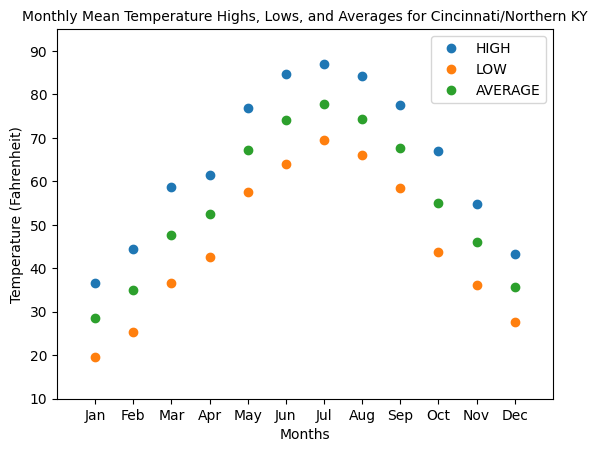

In [11]:
# Graphing mean data for Cincinnati/Northern KY

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, Cin_NKY_monthly_mean, 'o')    
plt.xlabel('Months', fontsize=10, color='k')
plt.ylabel('Temperature (Fahrenheit)', fontsize=10, color='k')  
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Cincinnati/Northern KY', fontsize=10, color='k')   
plt.legend(Cin_NKY_monthly_mean) 
plt.axis([-1, 12, 10, 95]) 

plt.show() 

In [12]:
Cin_NKY_monthly_max

,HIGH
DATE,
1,64
2,64
3,80
4,83
5,88
6,95
7,95
8,92
9,93


In [13]:
Cin_NKY_monthly_min

,LOW
DATE,
1,3
2,12
3,15
4,29
5,43
6,53
7,59
8,58
9,40


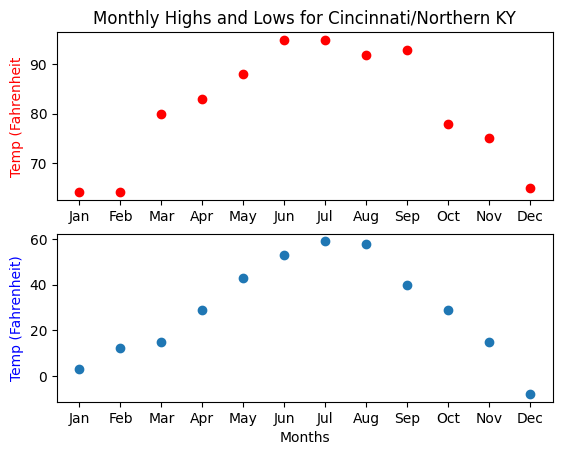

In [14]:
# Plot 1

x = months
y = Cin_NKY_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'o', color='r') 
plt.title('Monthly Highs and Lows for Cincinnati/Northern KY')
#plt.xlabel('Months') 
plt.ylabel('Temp (Fahrenheit', color='r')

# Plot 2
x = months
y = Cin_NKY_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'o')  
#plt.title('Lows for Cin/NKY') 
plt.xlabel('Months')
plt.ylabel('Temp (Fahrenheit)', color='b')

plt.show() 

In [15]:
Cin_NKY_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,5.6,2.34
2,4.8,6.30
3,2.3,2.14
4,0.0,3.30
5,0.0,9.08
6,0.0,2.38
7,0.0,4.48
8,0.0,7.91
9,0.0,1.94


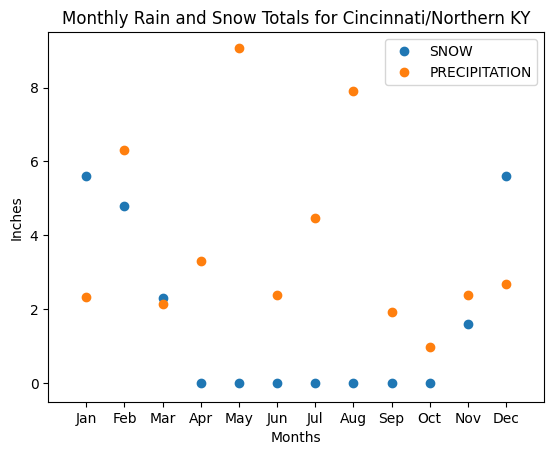

In [16]:
plt.plot(months, Cin_NKY_monthly_sum,'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for Cincinnati/Northern KY')
plt.legend(Cin_NKY_monthly_sum)
plt.axis([-1,12, -0.5,9.5])
plt.show() 

In [17]:
#Understanding Louisville Data
Loui_column_list = df2_Louis_W.columns
print(Loui_column_list) 
Loui_data_types = df2_Louis_W.dtypes
print(Loui_data_types) 
Loui_shape = df2_Louis_W.shape
print(Loui_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


In [18]:
#Renaming Louisville Columns
df2_Louis_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)

# Deleting Columns for the Louisville dataframe
df2_Louis_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [19]:
# Calculations for Louisville Ky
Loui_monthly_mean = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(2)  
Loui_monthly_max = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH']].max()
Loui_monthly_min = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['LOW']].min() 
Loui_monthly_sum = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

In [20]:
df2_Louis_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LOUISVILLE INT AIRPORT, KY US",2022-01-01,2.08,0.0,61,64,55
1,"LOUISVILLE INT AIRPORT, KY US",2022-01-02,0.01,0.0,46,57,31
2,"LOUISVILLE INT AIRPORT, KY US",2022-01-03,0.00,0.0,31,37,25
3,"LOUISVILLE INT AIRPORT, KY US",2022-01-04,0.00,0.0,32,46,24
4,"LOUISVILLE INT AIRPORT, KY US",2022-01-05,0.00,0.0,46,50,30
5,"LOUISVILLE INT AIRPORT, KY US",2022-01-06,0.21,2.3,26,30,15
6,"LOUISVILLE INT AIRPORT, KY US",2022-01-07,0.00,0.0,16,22,11


In [21]:
Loui_monthly_mean

,HIGH,LOW,AVERAGE
DATE,,,
1,41.29,23.65,32.77
2,49.79,29.39,39.71
3,62.97,40.52,51.45
4,66.57,47.63,57.07
5,80.32,61.45,70.87
6,88.30,68.13,78.73
7,90.74,73.16,81.71
8,87.90,70.23,78.55
9,81.70,62.23,71.83


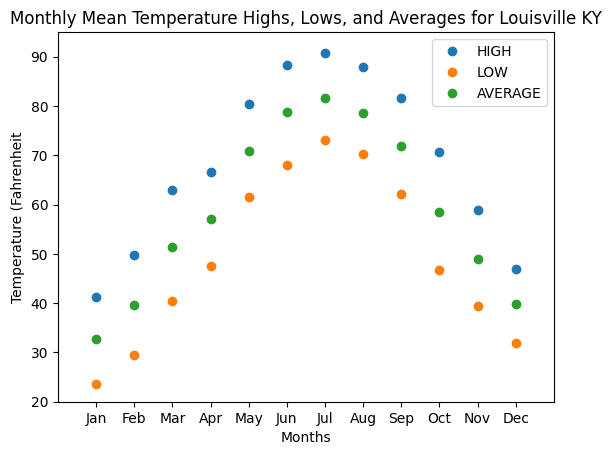

In [22]:
# Data Analysis for Louisville KY

plt.plot(months, Loui_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Louisville KY')
plt.legend(Loui_monthly_mean)
plt.axis([-1,12, 20,95])
plt.show() 

In [23]:
Loui_monthly_max

,HIGH
DATE,
1,64
2,69
3,84
4,87
5,91
6,100
7,101
8,94
9,96


In [24]:
Loui_monthly_min

,LOW
DATE,
1,8
2,14
3,19
4,32
5,52
6,58
7,65
8,62
9,46


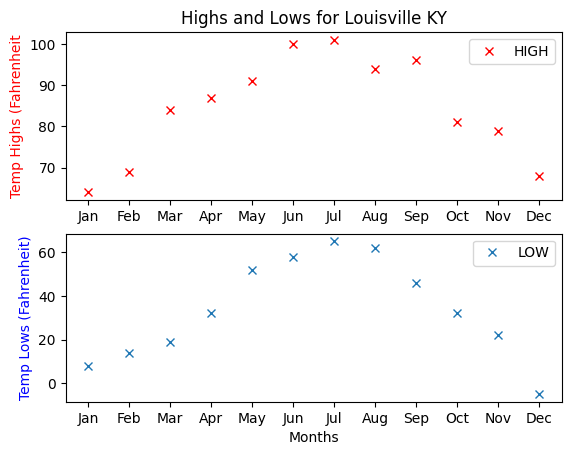

In [25]:
# Plot 1
x = months
y = Loui_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for Louisville KY')
#plt.xlabel('Months') 
plt.legend(Loui_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit', color='r')

# Plot 2
x = months
y = Loui_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)', color='b')
plt.legend(Loui_monthly_min)

plt.show() 

In [26]:
Loui_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,6.4,4.49
2,1.6,6.74
3,1.5,2.37
4,0.0,4.44
5,0.0,3.23
6,0.0,2.77
7,0.0,5.71
8,0.0,4.69
9,0.0,2.04


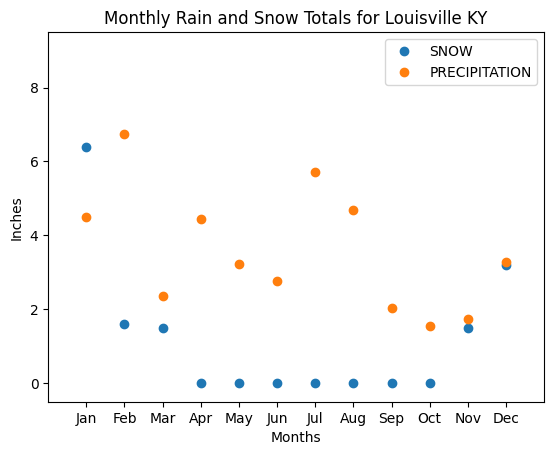

In [27]:
plt.plot(months, Loui_monthly_sum,'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for Louisville KY')
plt.legend(Loui_monthly_sum)
plt.axis([-1,12, -0.5,9.5])
plt.show() 

In [28]:
# Understanding New York City Data
NYC_column_list = df3_NYC_W.columns
print(NYC_column_list) 
NYC_data_types = df3_NYC_W.dtypes
print(NYC_data_types) 
NYC_shape = df3_NYC_W.shape
print(NYC_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


In [29]:
#Renaming New York City Columns
df3_NYC_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

#Deleting Columns for the New York City dataframe
df3_NYC_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [30]:
# Calculations for New York City
NYC_monthly_mean = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(2)  
NYC_monthly_max = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH']].max() 
NYC_monthly_min = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['LOW']].min() 
NYC_monthly_sum = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

In [31]:
df3_NYC_W.head(6) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"JFK INT AIRPORT, NY US",2022-01-01,1.22,0.0,50,53,48
1,"JFK INT AIRPORT, NY US",2022-01-02,0.03,0.0,53,59,38
2,"JFK INT AIRPORT, NY US",2022-01-03,0.00,0.0,34,39,22
3,"JFK INT AIRPORT, NY US",2022-01-04,0.00,0.0,25,33,19
4,"JFK INT AIRPORT, NY US",2022-01-05,0.29,0.0,36,46,30
5,"JFK INT AIRPORT, NY US",2022-01-06,0.00,0.0,39,41,34


In [32]:
# Data Analysis for New York City
NYC_monthly_mean

,HIGH,LOW,AVERAGE
DATE,,,
1,38.03,22.58,30.97
2,44.21,27.04,35.75
3,51.06,35.61,43.35
4,58.53,43.37,50.60
5,70.35,54.13,61.23
6,78.10,62.47,70.07
7,86.94,71.65,78.52
8,86.35,71.03,77.68
9,77.97,62.70,69.87


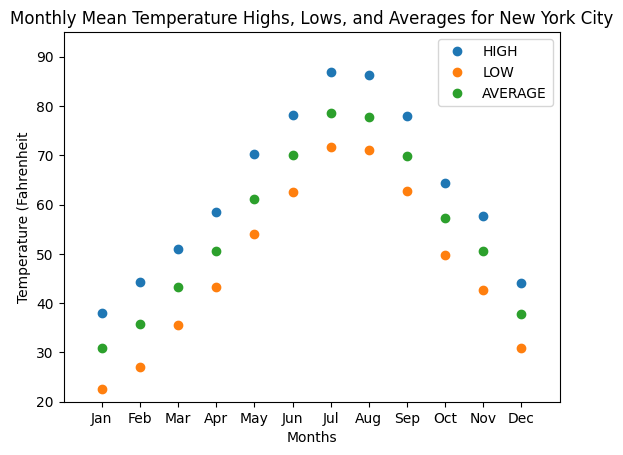

In [33]:
# Graph
plt.plot(months, NYC_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for New York City')
plt.legend(NYC_monthly_mean)
plt.axis([-1,12, 20,95])
plt.show()   

In [34]:
NYC_monthly_max

,HIGH
DATE,
1,59
2,69
3,63
4,72
5,94
6,94
7,96
8,93
9,89


In [35]:
NYC_monthly_min

,LOW
DATE,
1,9
2,15
3,19
4,37
5,42
6,55
7,65
8,63
9,49


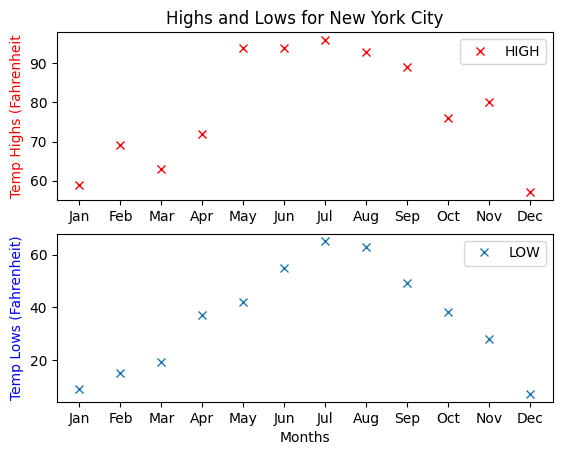

In [36]:
# Plot 1
x = months
y = NYC_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for New York City')
#plt.xlabel('Months') 
plt.legend(NYC_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit', color='r')

# Plot 2
x = months
y = NYC_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)', color='b')
plt.legend(NYC_monthly_min) 

plt.show() 

In [37]:
NYC_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,17.8,4.37
2,3.2,3.08
3,0.5,2.62
4,0.0,3.10
5,0.0,4.34
6,0.0,3.25
7,0.0,1.10
8,0.0,0.85
9,0.0,1.85


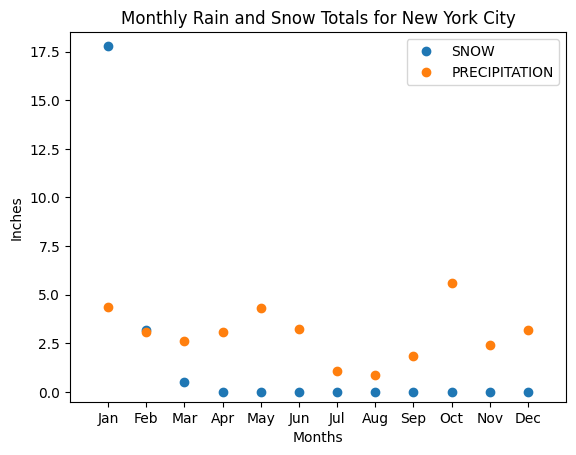

In [38]:
plt.plot(months, NYC_monthly_sum, 'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for New York City')
plt.legend(NYC_monthly_sum)
plt.axis([-1,12, -0.5,18.5])
plt.show() 

In [39]:
# Understanding Los Angeles Data
LA_column_list = df4_LA_W.columns
print(LA_column_list) 
LA_data_types = df4_LA_W.dtypes
print(LA_data_types) 
LA_shape = df4_LA_W.shape
print(LA_shape) 

Index(['NAME', 'LATITUDE', 'LONGITUDE', 'DATE', 'PRCP', 'SNOW', 'TAVG', 'TMAX',
       'TMIN'],
      dtype='object')
NAME                 object
LATITUDE            float64
LONGITUDE           float64
DATE         datetime64[ns]
PRCP                float64
SNOW                float64
TAVG                  int64
TMAX                  int64
TMIN                  int64
dtype: object
(365, 9)


In [40]:
# Renaming Los Angeles Columns 
df4_LA_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True) 

# Deleting Columns for the Los Angeles dataframe 
df4_LA_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

# Replacing NaN with 0 in LA dataframe
df4_LA_W['SNOW'] = df4_LA_W['SNOW'].fillna(0) # The fillna() function is used to fill NaN value with a specified value, in this case with a 0. 

In [41]:
df4_LA_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,0.0,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,0.0,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,0.0,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,0.0,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,0.0,54,65,45
5,"LAX AIRPORT, CA US",2022-01-06,0.0,0.0,56,66,47
6,"LAX AIRPORT, CA US",2022-01-07,0.0,0.0,53,57,51


In [42]:

# Calculations for Los Angeles
LA_monthly_mean = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean().round(2)  
LA_monthly_max = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH']].max() 
LA_monthly_min = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['LOW']].min() 
LA_monthly_sum = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum().round(1)  

# The round() function is used to return a floating number to a specified number of decimals. 

In [43]:
df4_LA_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,0.0,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,0.0,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,0.0,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,0.0,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,0.0,54,65,45
5,"LAX AIRPORT, CA US",2022-01-06,0.0,0.0,56,66,47
6,"LAX AIRPORT, CA US",2022-01-07,0.0,0.0,53,57,51


In [44]:
# Data Analysis for Los Angeles
LA_monthly_mean

,HIGH,LOW,AVERAGE
DATE,,,
1,68.52,50.00,58.65
2,70.93,48.79,59.54
3,69.23,52.58,60.26
4,71.20,55.97,62.80
5,69.71,57.68,62.97
6,73.67,62.37,67.00
7,75.10,64.03,68.26
8,78.03,66.39,71.00
9,83.20,68.83,74.87


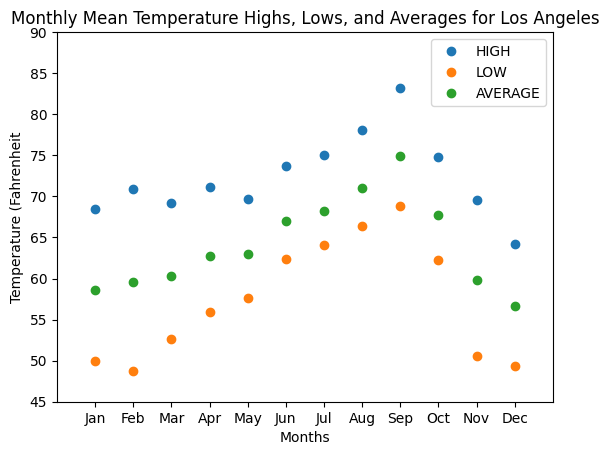

In [45]:
plt.plot(months, LA_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Los Angeles')
plt.legend(LA_monthly_mean)
plt.axis([-1,12, 45,90])
plt.show()  

In [46]:
LA_monthly_max

,HIGH
DATE,
1,80
2,89
3,84
4,97
5,81
6,80
7,85
8,84
9,102


In [47]:
LA_monthly_min

,LOW
DATE,
1,44
2,39
3,44
4,51
5,51
6,59
7,62
8,62
9,62


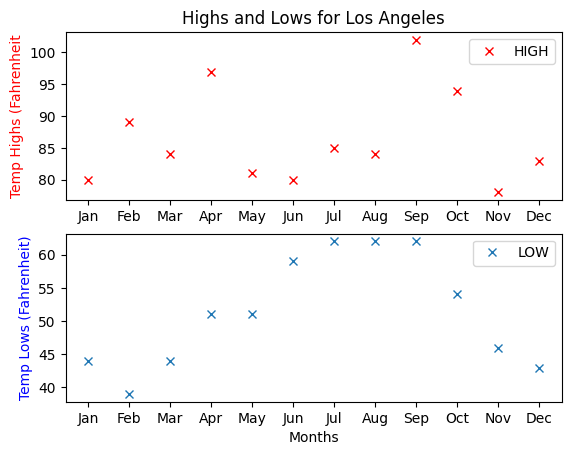

In [48]:
# Plot 1
x = months
y = LA_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for Los Angeles')
#plt.xlabel('Months') 
plt.legend(LA_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit', color='r')

# Plot 2
x = months
y = LA_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)', color='b')
plt.legend(LA_monthly_min) 

plt.show() 

In [49]:
LA_monthly_sum

,SNOW,PRECIPITATION
DATE,,
1,0.0,0.1
2,0.0,0.0
3,0.0,1.1
4,0.0,0.2
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.1


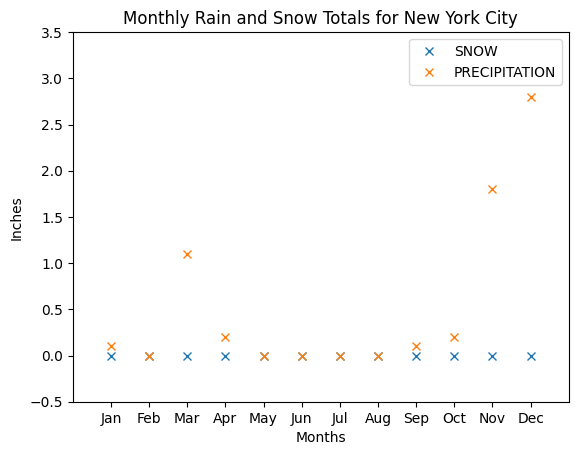

In [50]:
plt.plot(months, LA_monthly_sum, 'x',) 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for New York City')
plt.legend(LA_monthly_sum)
plt.axis([-1,12, -0.5,3.5])
plt.show() 

In [51]:
# Combine DataFrames 
df_Cities_Weather = pd.concat([df1_Cin_NKY_W, df2_Louis_W, df3_NYC_W, df4_LA_W]) # The concat() function is used to combine multiple dataframes.
df_Cities_Weather['DATE'] = pd.to_datetime(df_Cities_Weather['DATE']) 

In [52]:
Cities_monthly_mean = df_Cities_Weather.groupby([(df_Cities_Weather.DATE.dt.month), 'LOCATION'])[['HIGH', 'LOW', 'AVERAGE']].mean().round(2) 
# The groupby function() is used to group datapoints based on values in specified column or columns, in this case based on the location column. 
Cities_monthly_mean

HIGH    LOW  AVERAGE
DATE LOCATION                                                   
1    CIN/NKY INTERNATIONAL AIRPORT, KY US  36.65  19.68    28.55
     JFK INT AIRPORT, NY US                38.03  22.58    30.97
     LAX AIRPORT, CA US                    68.52  50.00    58.65
     LOUISVILLE INT AIRPORT, KY US         41.29  23.65    32.77
2    CIN/NKY INTERNATIONAL AIRPORT, KY US  44.39  25.32    35.00
     JFK INT AIRPORT, NY US                44.21  27.04    35.75
     LAX AIRPORT, CA US                    70.93  48.79    59.54
     LOUISVILLE INT AIRPORT, KY US         49.79  29.39    39.71
3    CIN/NKY INTERNATIONAL AIRPORT, KY US  58.74  36.65    47.55
     JFK INT AIRPORT, NY US                51.06  35.61    43.35
     LAX AIRPORT, CA US                    69.23  52.58    60.26
     LOUISVILLE INT AIRPORT, KY US         62.97  40.52    51.45
4    CIN/NKY INTERNATIONAL AIRPORT, KY US  61.53  42.70    52.47
     JFK INT AIRPORT, NY US                58.53  43.37    50.60
     LAX AIRPORT, CA US                    71.20  55.97    62.80
     LOUISVILLE INT AIRPORT, KY US         66.57  47.63    57.07
5    CIN/NKY INTERNATIONAL AIRPORT, KY US  76.90  57.52    67.26
     JFK INT AIRPORT, NY US                70.35  54.13    61.23
     LAX AIRPORT, CA US                    69.71  57.68    62.97
     LOUISVILLE INT AIRPORT, KY US         80.32  61.45    70.87
6    CIN/NKY INTERNATIONAL AIRPORT, KY US  84.63  63.90    74.17
     JFK INT AIRPORT, NY US                78.10  62.47    70.07
     LAX AIRPORT, CA US                    73.67  62.37    67.00
     LOUISVILLE INT AIRPORT, KY US         88.30  68.13    78.73
7    CIN/NKY INTERNATIONAL AIRPORT, KY US  86.90  69.42    77.87
     JFK INT AIRPORT, NY US                86.94  71.65    78.52
     LAX AIRPORT, CA US                    75.10  64.03    68.26
     LOUISVILLE INT AIRPORT, KY US         90.74  73.16    81.71
8    CIN/NKY INTERNATIONAL AIRPORT, KY US  84.16  65.94    74.42
     JFK INT AIRPORT, NY US                86.35  71.03    77.68
     LAX AIRPORT, CA US                    78.03  66.39    71.00
     LOUISVILLE INT AIRPORT, KY US         87.90  70.23    78.55
9    CIN/NKY INTERNATIONAL AIRPORT, KY US  77.57  58.57    67.67
     JFK INT AIRPORT, NY US                77.97  62.70    69.87
     LAX AIRPORT, CA US                    83.20  68.83    74.87
     LOUISVILLE INT AIRPORT, KY US         81.70  62.23    71.83
10   CIN/NKY INTERNATIONAL AIRPORT, KY US  67.00  43.71    54.97
     JFK INT AIRPORT, NY US                64.45  49.74    57.19
     LAX AIRPORT, CA US                    74.84  62.26    67.74
     LOUISVILLE INT AIRPORT, KY US         70.77  46.81    58.45
11   CIN/NKY INTERNATIONAL AIRPORT, KY US  54.87  36.17    46.00
     JFK INT AIRPORT, NY US                57.77  42.70    50.53
     LAX AIRPORT, CA US                    69.60  50.53    59.77
     LOUISVILLE INT AIRPORT, KY US         58.90  39.40    49.03
12   CIN/NKY INTERNATIONAL AIRPORT, KY US  43.23  27.58    35.74
     JFK INT AIRPORT, NY US                44.10  30.87    37.84
     LAX AIRPORT, CA US                    64.16  49.32    56.71
     LOUISVILLE INT AIRPORT, KY US         46.94  31.87    39.81

<AxesSubplot: title={'center': 'Temperature Comparison for Cincinnati/NKY, Louisville, New York, Los Angeles'}, xlabel='Months (2022)', ylabel='Temperature (Fahrenheit)'>

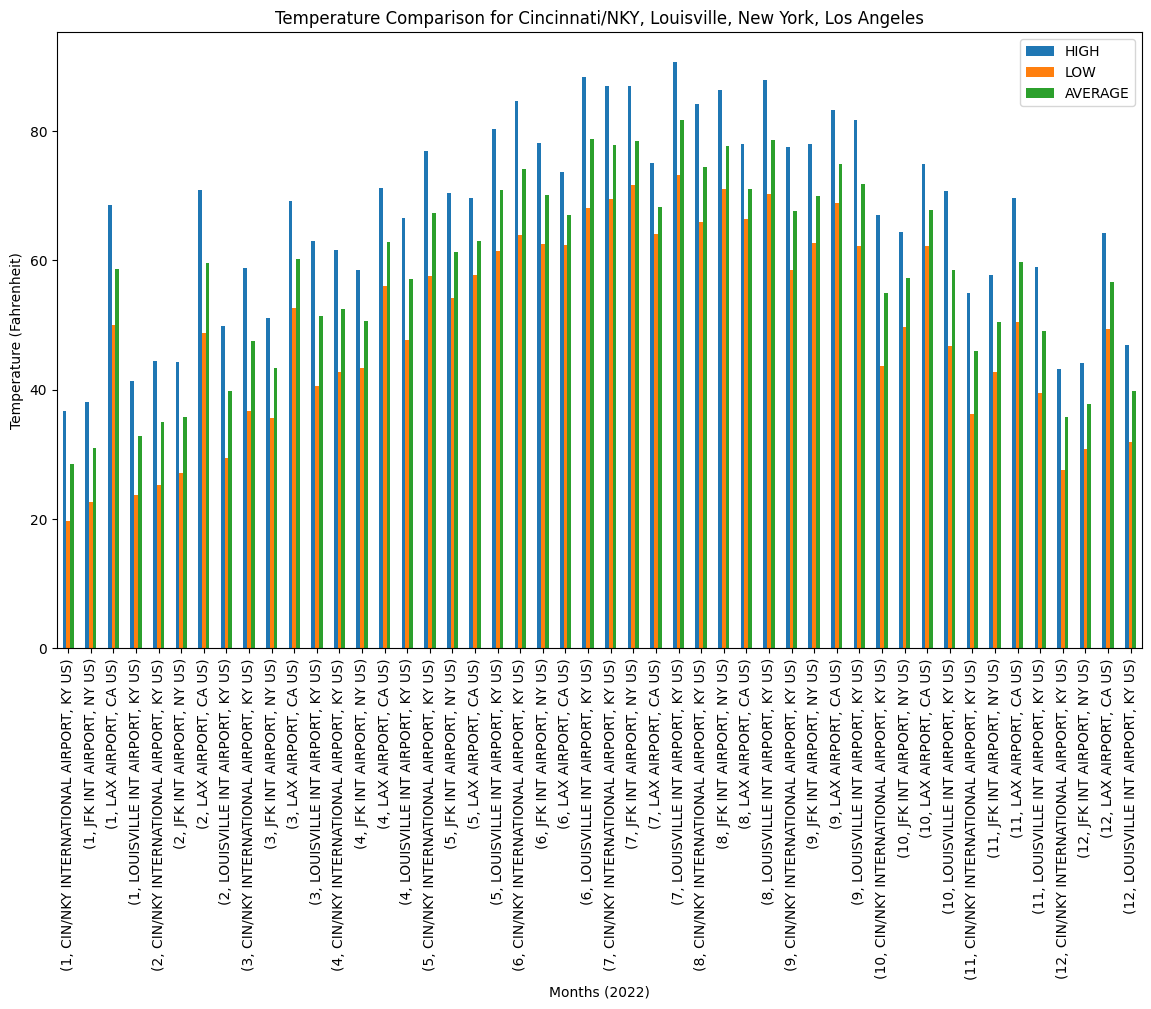

In [53]:
Cities_monthly_mean.plot(kind='bar', figsize=(14,8), xlabel='Months (2022)', ylabel='Temperature (Fahrenheit)', title='Temperature Comparison for Cincinnati/NKY, Louisville, New York, Los Angeles')  


In [54]:
Cities_monthly_sum = df_Cities_Weather.groupby([(df_Cities_Weather.DATE.dt.month), 'LOCATION'])[['SNOW', 'PRECIPITATION']].sum().round(2)
Cities_monthly_sum

SNOW  PRECIPITATION
DATE LOCATION                                                 
1    CIN/NKY INTERNATIONAL AIRPORT, KY US   5.6           2.34
     JFK INT AIRPORT, NY US                17.8           4.37
     LAX AIRPORT, CA US                     0.0           0.09
     LOUISVILLE INT AIRPORT, KY US          6.4           4.49
2    CIN/NKY INTERNATIONAL AIRPORT, KY US   4.8           6.30
     JFK INT AIRPORT, NY US                 3.2           3.08
     LAX AIRPORT, CA US                     0.0           0.04
     LOUISVILLE INT AIRPORT, KY US          1.6           6.74
3    CIN/NKY INTERNATIONAL AIRPORT, KY US   2.3           2.14
     JFK INT AIRPORT, NY US                 0.5           2.62
     LAX AIRPORT, CA US                     0.0           1.10
     LOUISVILLE INT AIRPORT, KY US          1.5           2.37
4    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           3.30
     JFK INT AIRPORT, NY US                 0.0           3.10
     LAX AIRPORT, CA US                     0.0           0.23
     LOUISVILLE INT AIRPORT, KY US          0.0           4.44
5    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           9.08
     JFK INT AIRPORT, NY US                 0.0           4.34
     LAX AIRPORT, CA US                     0.0           0.00
     LOUISVILLE INT AIRPORT, KY US          0.0           3.23
6    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           2.38
     JFK INT AIRPORT, NY US                 0.0           3.25
     LAX AIRPORT, CA US                     0.0           0.01
     LOUISVILLE INT AIRPORT, KY US          0.0           2.77
7    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           4.48
     JFK INT AIRPORT, NY US                 0.0           1.10
     LAX AIRPORT, CA US                     0.0           0.00
     LOUISVILLE INT AIRPORT, KY US          0.0           5.71
8    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           7.91
     JFK INT AIRPORT, NY US                 0.0           0.85
     LAX AIRPORT, CA US                     0.0           0.00
     LOUISVILLE INT AIRPORT, KY US          0.0           4.69
9    CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           1.94
     JFK INT AIRPORT, NY US                 0.0           1.85
     LAX AIRPORT, CA US                     0.0           0.13
     LOUISVILLE INT AIRPORT, KY US          0.0           2.04
10   CIN/NKY INTERNATIONAL AIRPORT, KY US   0.0           0.99
     JFK INT AIRPORT, NY US                 0.0           5.61
     LAX AIRPORT, CA US                     0.0           0.24
     LOUISVILLE INT AIRPORT, KY US          0.0           1.54
11   CIN/NKY INTERNATIONAL AIRPORT, KY US   1.6           2.39
     JFK INT AIRPORT, NY US                 0.0           2.43
     LAX AIRPORT, CA US                     0.0           1.77
     LOUISVILLE INT AIRPORT, KY US          1.5           1.74
12   CIN/NKY INTERNATIONAL AIRPORT, KY US   5.6           2.69
     JFK INT AIRPORT, NY US                 0.0           3.17
     LAX AIRPORT, CA US                     0.0           2.79
     LOUISVILLE INT AIRPORT, KY US          3.2           3.28

<AxesSubplot: title={'center': 'Monthly Total Snowfall and Precipitation for Cincinnati/NKY, Louisville, New York, Los Angeles'}, xlabel='Months', ylabel='Inches'>

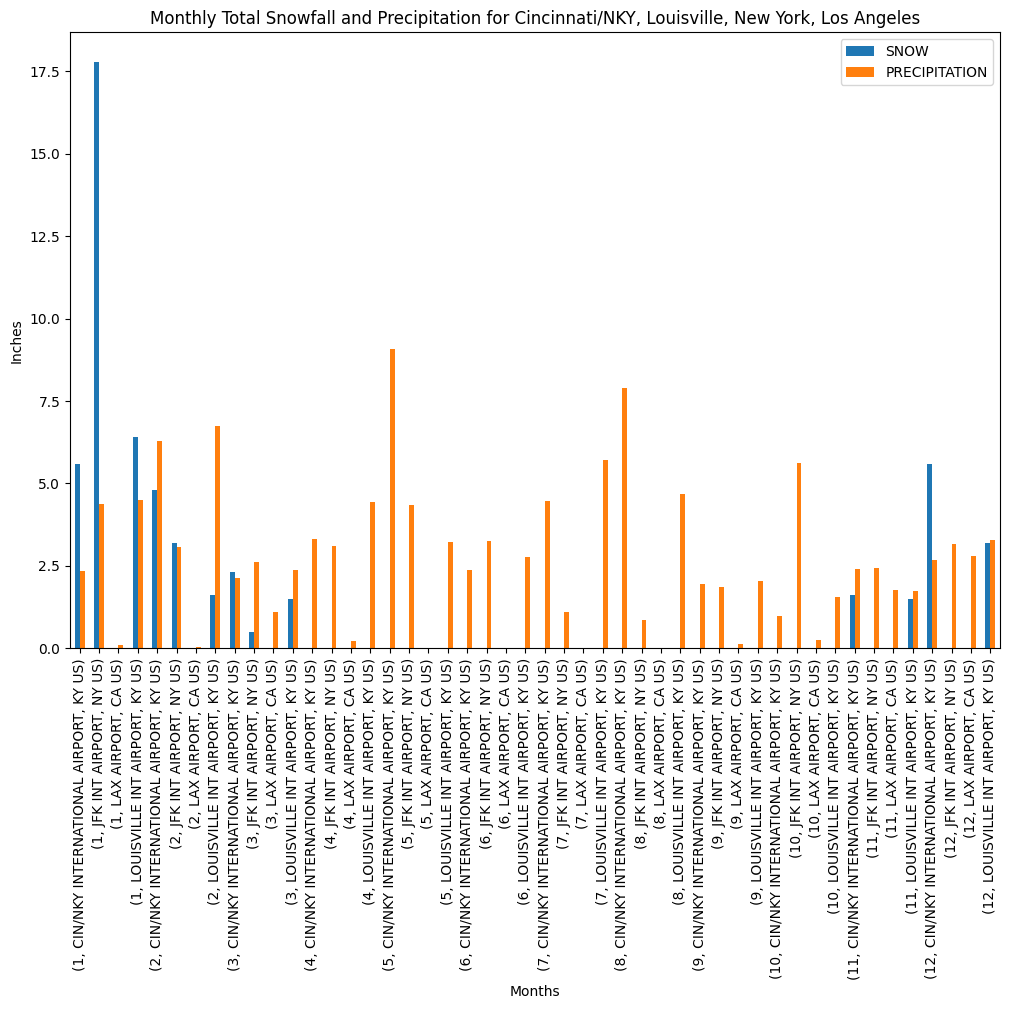

In [55]:
Cities_monthly_sum.plot(kind='bar', figsize=(12,8), xlabel='Months', ylabel='Inches', title='Monthly Total Snowfall and Precipitation for Cincinnati/NKY, Louisville, New York, Los Angeles')